In [19]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from keras_retinanet import models
from keras_retinanet.utils.image import preprocess_image, resize_image
from keras_retinanet.utils.visualization import draw_box, draw_caption
from keras_retinanet.utils.colors import label_color
import json

In [2]:
model = models.load_model("retinanet_5_classes.h5", backbone_name='resnet50')
model = models.convert_model(model)

In [47]:
with open('label_map.json','r') as f:
    label_map = json.load(f)

In [48]:
im = np.array(Image.open("uploads/bed.jpg"))
print("im.shape:", im.shape)

im.shape: (726, 1332, 3)


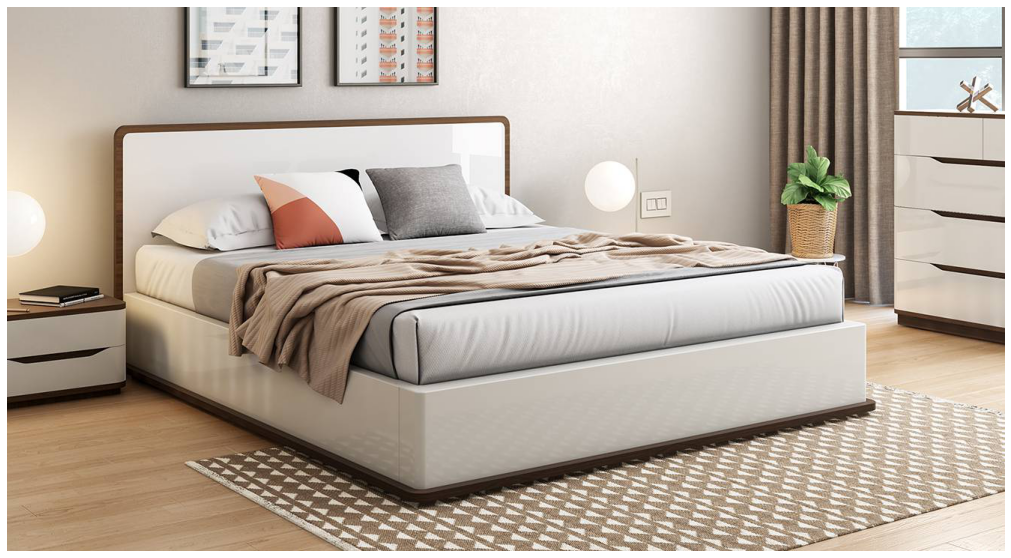

In [49]:
plt.axis('off')
plt.imshow(im)
plt.show()

In [50]:
imp = preprocess_image(im)
imp, scale = resize_image(im)

In [51]:
boxes, scores, labels = model.predict_on_batch(
np.expand_dims(imp, axis=0)
)

In [52]:
boxes /= scale

In [53]:
plt.rcParams['figure.figsize'] = [20, 10]

Bed
0.581648


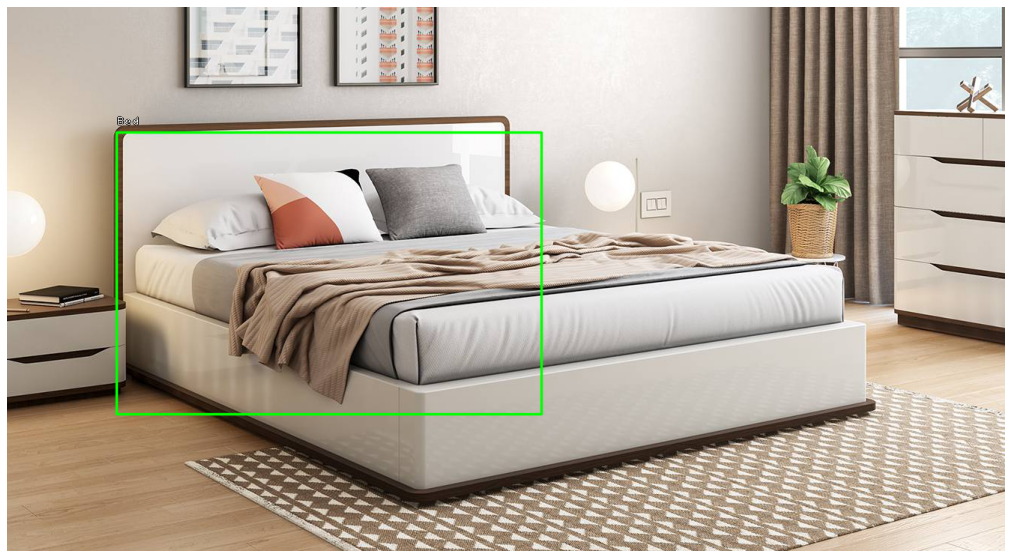

In [54]:
for box, score, label in zip(boxes[0], scores[0], labels[0]):
# scores are sorted so we can quit as soon
# as we see a score below threshold
    if score < 0.5:
        break

    box = box.astype(np.int32)
    color = label_color(label)
    draw_box(im, box, color=(0,255,0))

    class_name = label_map[str(label)]
    print(class_name)
    print(score)
    caption = f"{class_name}"
    draw_caption(im, box, caption)

    plt.axis('off')
    plt.imshow(im)
    plt.show()


In [22]:
label_map

{'0': 'Bed', '1': 'Microwave', '2': 'Refrigerator', '3': 'Sink', '4': 'Toilet'}

In [59]:
print(model.predict(np.expand_dims(imp,axis=0)))

[array([[[ 1.4636151e+02,  1.6755807e+02,  7.1422595e+02,  5.4428137e+02],
        [ 1.5067502e+02,  1.7432703e+02,  1.1420660e+03,  6.6469641e+02],
        [ 6.7519946e+02,  2.6810349e+02,  1.1237664e+03,  4.6524792e+02],
        ...,
        [-1.0000000e+00, -1.0000000e+00, -1.0000000e+00, -1.0000000e+00],
        [-1.0000000e+00, -1.0000000e+00, -1.0000000e+00, -1.0000000e+00],
        [-1.0000000e+00, -1.0000000e+00, -1.0000000e+00, -1.0000000e+00]]],
      dtype=float32), array([[ 0.581648  ,  0.3722645 ,  0.22740293,  0.16238013,  0.15470305,
         0.14503363,  0.12311772,  0.12232104,  0.11400542,  0.10092747,
         0.10041267,  0.09470358,  0.08860621,  0.08423227,  0.07981542,
         0.07569745,  0.07535395,  0.07353988,  0.06994238,  0.06950772,
         0.06945544,  0.0670734 ,  0.06504124,  0.06303546,  0.06189647,
         0.06145501,  0.06048724,  0.05969477,  0.05942774,  0.05690458,
         0.05663526,  0.05630076,  0.05479357,  0.05444667,  0.05431074,
       

In [60]:
label_map

{'0': 'Bed', '1': 'Microwave', '2': 'Refrigerator', '3': 'Sink', '4': 'Toilet'}